<a href="https://colab.research.google.com/github/alimoradi296/DeepLearning/blob/main/TLresnet50catdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT LIBRARIES

In [1]:
import tensorflow as tf

import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

In [2]:
tf.__version__

'2.9.2'

#IMPORT MODEL WITH PRE-TRAINED WEIGHTS

In [4]:
#model=tf.keras.applications.ResNet50(weights='imagenet')

#APPLY TRANSFER LEARNING AND RETRAIN THE MODEL

In [5]:
base_model=tf.keras.applications.ResNet50(weights='imagenet',include_top=False)

94765736/94765736 [==============================] - 3s 0us/step


In [6]:
print(base_model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

In [9]:
for i,layer in enumerate(base_model.layers):
  print(i,layer.name)

0 input_2
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [10]:
x=base_model.output
x=tf.keras.layers.GlobalAveragePooling2D()(x)

In [12]:
x=tf.keras.layers.Dense(1024,activation='relu')(x)
x=tf.keras.layers.Dense(1024,activation='relu')(x)
x=tf.keras.layers.Dense(1024,activation='relu')(x)
x=tf.keras.layers.Dense(512,activation='relu')(x)
preds=tf.keras.layers.Dense(2,activation='softmax')(x)


In [13]:
model=tf.keras.Model(inputs=base_model.input,outputs=preds)

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                           

In [15]:
for layer in model.layers[:175]:
  layer.trainable=False

In [17]:
for layer in model.layers[175:]:
  layer.trainable=True

In [19]:
from google.colab import  drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import os
#os.chdir(r"/content/drive/My Drive")

In [24]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

train_generator=train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/train/',
                                                  target_size=(224,224),
                                                  color_mode='rgb',
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  shuffle=True)


Found 202 images belonging to 2 classes.


In [25]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
history=model.fit_generator(generator=train_generator,steps_per_epoch=train_generator.n//train_generator.batch_size,epochs=5)

<ipython-input-26-8614bb8eacde>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=train_generator,steps_per_epoch=train_generator.n//train_generator.batch_size,epochs=5)


Epoch 1/5
6/6 [==============================] - 67s 9s/step - loss: 0.7805 - accuracy: 0.6235
Epoch 2/5
6/6 [==============================] - 1s 138ms/step - loss: 0.2575 - accuracy: 0.8765
Epoch 3/5
6/6 [==============================] - 1s 146ms/step - loss: 0.8504 - accuracy: 0.8941
Epoch 4/5
6/6 [==============================] - 1s 156ms/step - loss: 0.4384 - accuracy: 0.9059
Epoch 5/5
6/6 [==============================] - 1s 157ms/step - loss: 0.0956 - accuracy: 0.9824


#EVALUATE THE MODEL

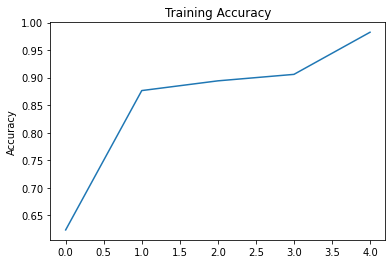

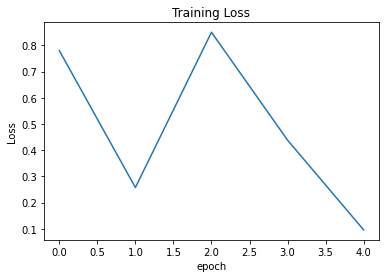

In [30]:
acc=history.history['accuracy']
loss=history.history['loss']

plt.figure()
plt.plot(acc,label='Training Accuracy')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.figure()
plt.plot(loss,label='Training Loss')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()



In [46]:
sample_image0=tf.keras.preprocessing.image.load_img('/content/drive/My Drive/Colab Notebooks/cat.282.jpg',target_size=(224,224))
sample_image1=tf.keras.preprocessing.image.load_img('/content/drive/My Drive/Colab Notebooks/dog.309.jpg',target_size=(224,224))


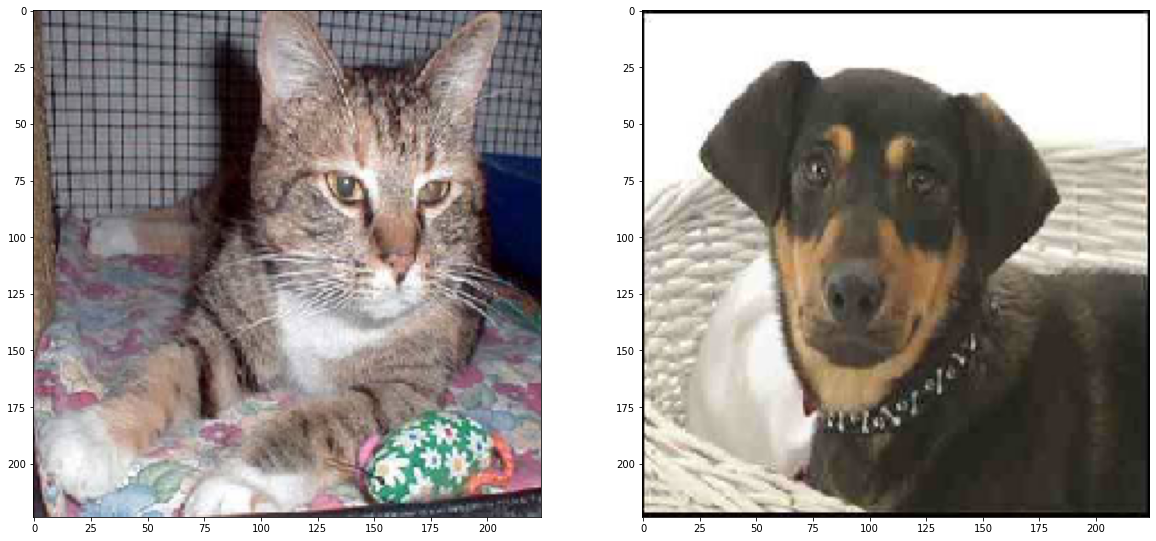

In [47]:
fig,axes=plt.subplots(1,2,figsize=(20,20))
axes[0].imshow(sample_image0)
axes[1].imshow(sample_image1)
fig.show()


In [48]:
sample_image0=tf.keras.preprocessing.image.img_to_array(sample_image0)
sample_image1=tf.keras.preprocessing.image.img_to_array(sample_image1)
print(sample_image0.shape)
print(sample_image1.shape)



(224, 224, 3)
(224, 224, 3)


In [49]:
sample_image0=np.expand_dims(sample_image0,axis=0)
sample_image1=np.expand_dims(sample_image1,axis=0)


In [51]:
sample_image0=tf.keras.applications.resnet50.preprocess_input(sample_image0)
predictions=model.predict(sample_image0)
print('predictions',predictions)

1/1 [==============================] - 0s 42ms/step
predictions [[9.9998903e-01 1.0986370e-05]]


In [52]:
sample_image1=tf.keras.applications.resnet50.preprocess_input(sample_image1)
predictions=model.predict(sample_image1)
print('predictions',predictions)

1/1 [==============================] - 0s 27ms/step
predictions [[2.9457300e-07 9.9999976e-01]]
